In [81]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [82]:
df_can = pd.read_excel("Canada.xlsx", sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [83]:
df_can.columns.tolist()
df_can.index.tolist()
print(type(df_can.columns.tolist()))
print(type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


1. Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).

In [84]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

2. Rename some of the columns so that they make sense.

In [85]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

3. For consistency, ensure that all column labels of type string.

In [86]:
df_can.columns = list(map(str, df_can.columns))

In [87]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

True

4. Set the country name as index - useful for quickly looking up countries using .loc method.

In [88]:
df_can.set_index('Country', inplace=True)

Adding total column

In [89]:
df_can['Total'] = df_can.sum(axis=1)

5. Check if there are null values

In [90]:
df_can.isnull().sum()

Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

## Line Plot

continous dataset. Used when you are interested trands of data in a period of time

In [91]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['ggplot', 'fast', 'grayscale', 'dark_background', 'seaborn-white', '_classic_test', 'seaborn-notebook', 'seaborn-paper', 'classic', 'seaborn-pastel', 'bmh', 'seaborn', 'seaborn-muted', 'Solarize_Light2', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-talk', 'tableau-colorblind10', 'seaborn-darkgrid', 'seaborn-poster', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-whitegrid', 'seaborn-ticks', 'seaborn-bright', 'seaborn-deep']


In [92]:
years = list(map(str, range(1980, 2014))) # handy list

In [93]:
haiti = df_can.loc['Haiti',years] # passing in years 1980 - 2013 to exclude the 'total' column

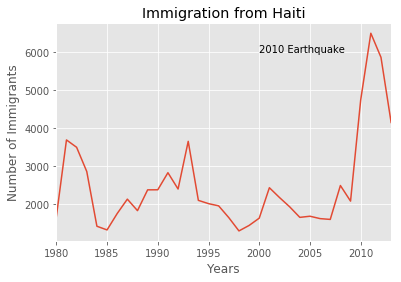

In [94]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') 

plt.show() 

Compare the trend of top 5 countries that contributed the most to immigration to Canada.

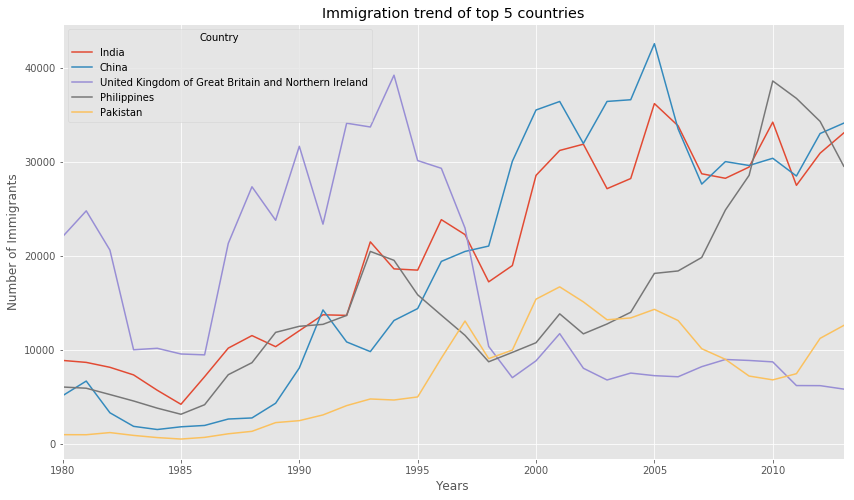

In [95]:
# Scripting layer

df_can.sort_values(by = "Total",ascending = False, axis = 0, inplace= True)
df_top5 = df_can.head(5)
#df_top5.drop(["Continent","Region","DevName","Total"], axis=1, inplace=True)
df_top5 = df_top5[years].transpose()
df_top5.head(5)

df_top5.index = df_top5.index.map(int)
df_top5.plot(kind="line", figsize=(14, 8))
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()


## Area Plot

Area chart or area graph. Used to represent cumulated total, using numbers or percentages

Text(0.5, 0, 'Years')

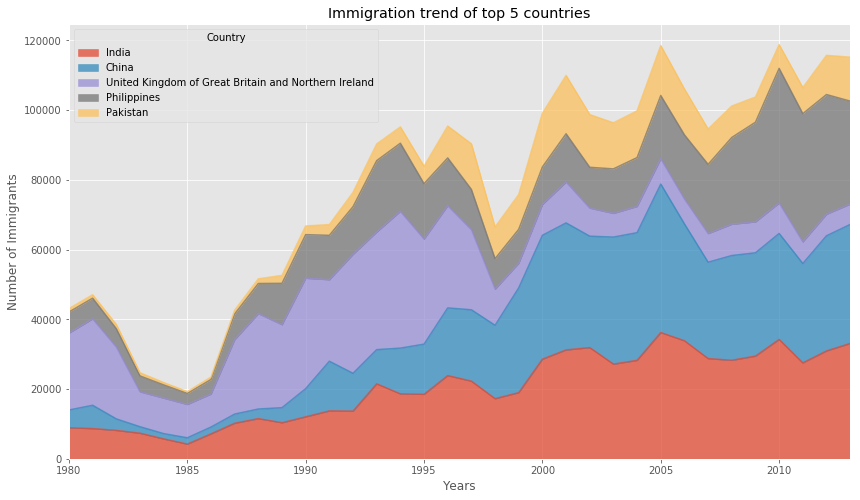

In [124]:
# Artist layer

ax = df_top5.plot(kind="area", stacked=True, alpha = 0.75, figsize=(14, 8))

ax.set_title('Immigration trend of top 5 countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')


## Histogram

A histogram is a way of representing the *frequency* distribution of numeric d

In [116]:
df_sud = df_can.loc[["Colombia","Brazil","Peru"],years].transpose()

Text(0.5, 0, 'Number of Immigrants')

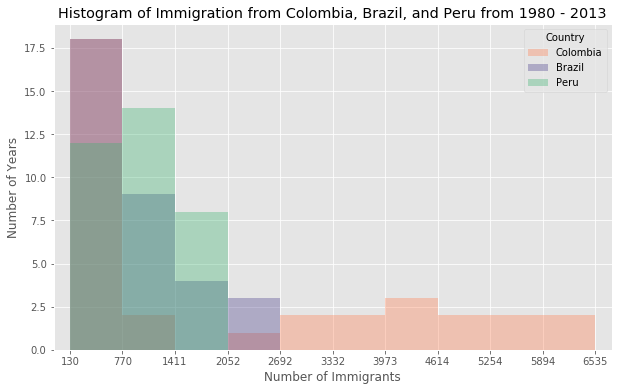

In [118]:
count, bin_edges = np.histogram(df_sud,10)
xmin = bin_edges[0] - 200
xmax = bin_edges[-1] + 200

ax = df_sud.plot(kind="hist", figsize = (10,6),
                 bins = 10,
                 xticks = bin_edges,
                 alpha = 0.35,
                 stacked = False,
                 xlim = (xmin,xmax),
                 color=['coral', 'darkslateblue', 'mediumseagreen']
)

ax.set_title('Histogram of Immigration from Colombia, Brazil, and Peru from 1980 - 2013')
ax.set_ylabel('Number of Years')
ax.set_xlabel('Number of Immigrants') 

## Bar charts

Bar graphs usually represent numerical and categorical variables grouped in intervals. 

Text(0, 0.5, 'Number of Immigrants')

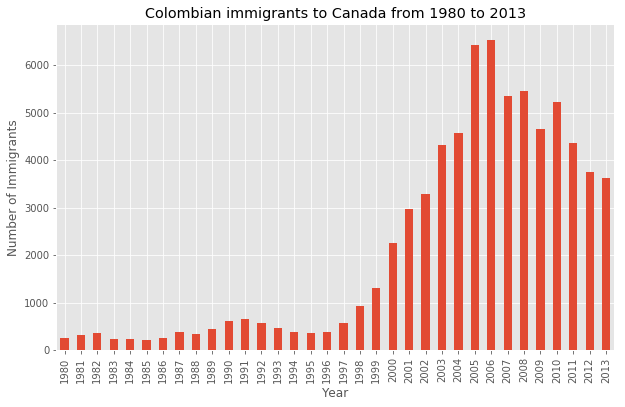

In [122]:
df_colombia = df_can.loc["Colombia",years]

ax = df_colombia.plot(kind="bar", figsize = (10,6))

ax.set_title('Colombian immigrants to Canada from 1980 to 2013')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants') 

## Pie Chart

Circualar graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices.

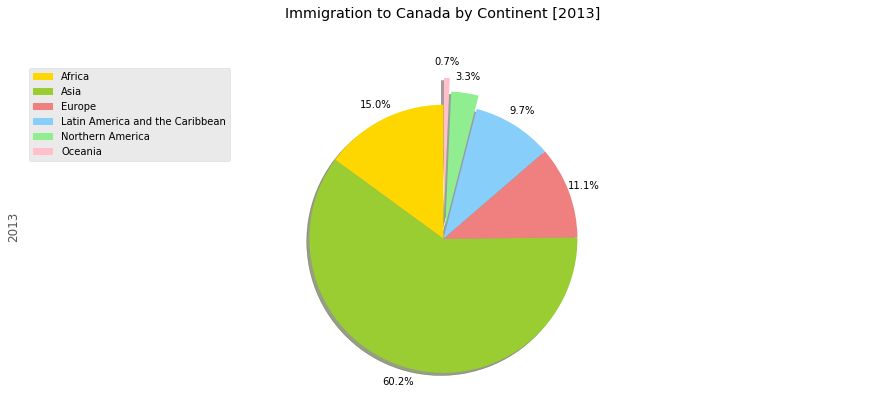

In [126]:
df_continent = df_can.groupby("Continent", axis=0).sum()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0, 0, 0.1, 0.2] # ratio for each continent with which to offset each wedge.


ax = df_continent["2013"].plot(kind="pie",figsize = (15,6),                             
                               autopct='%1.1f%%', 
                               startangle=90,    
                               shadow=True,       
                               labels=None,         # turn off labels on pie chart
                               pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                               colors=colors_list,  # add custom colors
                               explode=explode_list # 'explo
                              )
ax.set_title('Immigration to Canada by Continent [2013]', y=1.12) 
ax.axis('equal') 
ax.legend(labels=df_continent.index, loc='upper left') 

## Box Plots

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions: 
Min, First quartile, Median, Third quartile, and max

Text(0, 0.5, 'Number of Immigrants')

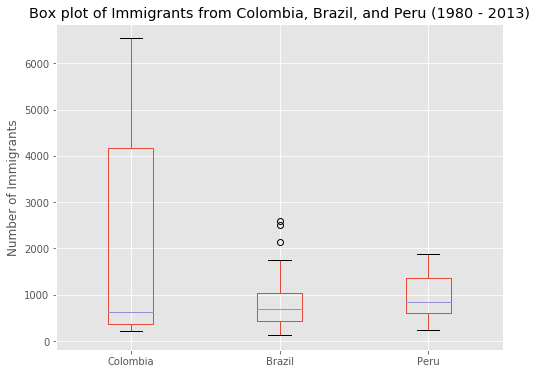

In [128]:
df_CI = df_can.loc[["Colombia","Brazil","Peru"],years].transpose()

ax = df_CI.plot(kind="box",figsize=(8,6))
ax.set_title('Box plot of Immigrants from Colombia, Brazil, and Peru (1980 - 2013)')
ax.set_ylabel('Number of Immigrants')

## Scatter plots

A `scatter plot` (2D) is a useful method of comparing variables against each other

In [129]:
df_countries = pd.DataFrame(df_can.loc[["Colombia","Brazil","Peru"]])

df_total = pd.DataFrame(df_countries[years].sum(axis=0))
df_total.index = map(int,df_total.index)
df_total.reset_index(inplace=True)
df_total.columns = ["year","total"]
df_total.head()

,year,total
0,1980,794
1,1981,1002
2,1982,953
3,1983,624
4,1984,686


Text(0, 0.5, 'Number of Immigrants')

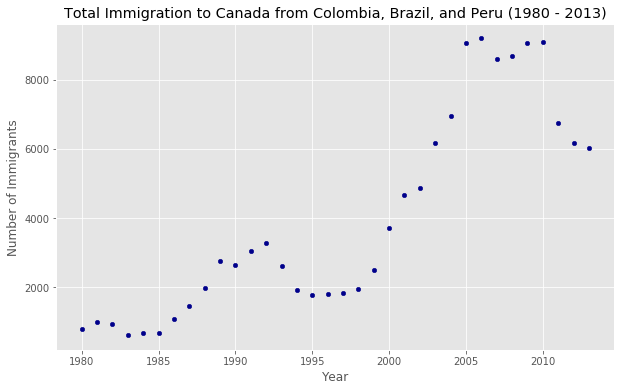

In [130]:
ax = df_total.plot(kind="scatter",x="year",y="total", figsize=(10, 6), color='darkblue')

ax.set_title('Total Immigration to Canada from Colombia, Brazil, and Peru (1980 - 2013)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')

## Bubble plots

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z)

In [143]:
df_can_t = df_can[years].transpose() # transposed dataframe
# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)
# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'
# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# normalize Colombia data
norm_colombia = (df_can_t['Colombia'] - df_can_t['Colombia'].min()) / (df_can_t['Colombia'].max() - df_can_t['Colombia'].min())

# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Peru data
norm_peru = (df_can_t['Peru'] - df_can_t['Peru'].min()) / (df_can_t['Peru'].max() - df_can_t['Peru'].min())


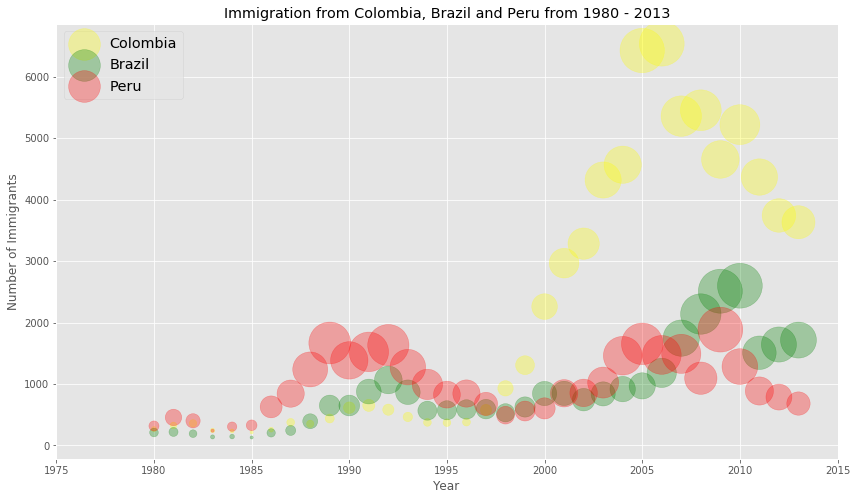

In [145]:
ax0 = df_can_t.plot(kind="scatter",
                    x="Year",
                    y="Colombia",
                    figsize=(14,8),
                    alpha=0.3,
                    color="yellow",
                    s=norm_colombia * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

ax1 = df_can_t.plot(kind="scatter",
                    x="Year",
                    y="Brazil",
                    alpha=0.3,
                    color="green",
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    ax=ax0
                    )

ax2 = df_can_t.plot(kind="scatter",
                    x="Year",
                    y="Peru",
                    alpha=0.3,
                    color="red",
                    s=norm_peru * 2000 + 10,  # pass in weights 
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Colombia, Brazil and Peru from 1980 - 2013')
ax0.legend(['Colombia','Brazil', 'Peru'], loc='upper left', fontsize='x-large')